In [1]:
import sys, os

# Projektroot = eine Ebene über notebooks/
project_root = os.path.abspath("..")
print("Project root:", project_root)

# Nur hinzufügen, wenn noch nicht vorhanden
if project_root not in sys.path:
    sys.path.append(project_root)

print("sys.path enthält project_root:", project_root in sys.path)


Project root: /Users/andregrau/Desktop/Thesis/Tool/Python_Tool/simLIS
sys.path enthält project_root: True


In [2]:
import os, sys
print("sys.path: ", sys.path)
print("model exists:", os.path.isdir("../model"))
print("init exists:", os.path.isfile("../model/__init__.py"))
print("sim_model exists:", os.path.isfile("../model/sim_model.py"))


sys.path:  ['/opt/anaconda3/envs/test1/lib/python313.zip', '/opt/anaconda3/envs/test1/lib/python3.13', '/opt/anaconda3/envs/test1/lib/python3.13/lib-dynload', '', '/opt/anaconda3/envs/test1/lib/python3.13/site-packages', '/Users/andregrau/Desktop/Thesis/Tool/Python_Tool/simLIS']
model exists: True
init exists: True
sim_model exists: True


In [3]:
from model.sim_model import load_scenario, simulate_load_profile

scenario_name = "office"            # gewünschtes Scenario eingeben
scenario_path = f"../scenarios/{scenario_name}.yaml"

scenario = load_scenario(scenario_path)
timestamps, load_kw, sessions = simulate_load_profile(scenario)


In [4]:
timestamps, load_kw, sessions = simulate_load_profile(scenario)
len(timestamps), load_kw[:10]


(672, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

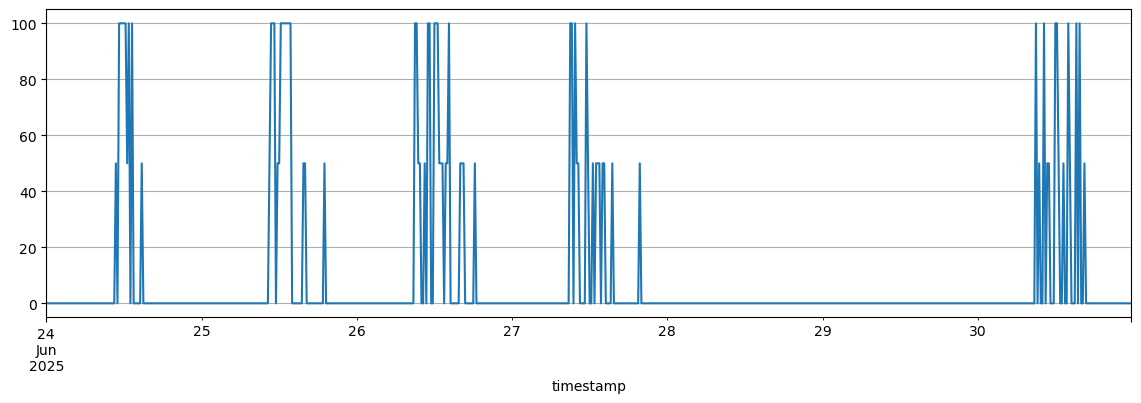

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"timestamp": timestamps, "load_kw": load_kw})
df = df.set_index("timestamp")

df["load_kw"].plot(figsize=(14,4))
plt.grid(True)
plt.show()


In [6]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from model.sim_model import load_scenario, simulate_load_profile
from model.sim_extended import extend_profile


In [7]:
# Szenario auswählen
scenario_name = "office"
scenario_path = f"../scenarios/{scenario_name}.yaml"

print("Verwendetes Szenario:", scenario_path)

# Lade die YAML
scenario = load_scenario(scenario_path)

# Basissimulation (7 Tage)
timestamps_base, load_kw_base, sessions = simulate_load_profile(scenario)

# Start- und Endzeit zur Kontrolle
timestamps_base[0], timestamps_base[-1]



Verwendetes Szenario: ../scenarios/office.yaml


(datetime.datetime(2025, 6, 24, 0, 0), datetime.datetime(2025, 6, 30, 23, 45))

In [8]:
timestamps_base, load_kw_base, sessions = simulate_load_profile(scenario)

print(f"Anzahl Zeitschritte (Basisprofil): {len(timestamps_base)}")
print(f"Erster Timestamp: {timestamps_base[0]}")
print(f"Letzter Timestamp: {timestamps_base[-1]}")


Anzahl Zeitschritte (Basisprofil): 672
Erster Timestamp: 2025-06-24 00:00:00
Letzter Timestamp: 2025-06-30 23:45:00


In [9]:
# Basis-Horizont laut Szenario
base_days = scenario["sim_horizon_days"]

# Zielhorizont: entweder aus YAML (result_horizon_days) oder = base_days
target_days = scenario.get("result_horizon_days", base_days)

print(f"Basis-Simulationshorizont: {base_days} Tage")
print(f"Zielhorizont (Ausgabe): {target_days} Tage")

if target_days > base_days:
    timestamps, load_kw = extend_profile(
        timestamps_base,
        load_kw_base,
        target_days=target_days,
        noise_std=0.0,      # hier könntest du z.B. 0.05 setzen für leichte Variation
        random_seed=42,
    )
else:
    timestamps, load_kw = timestamps_base, load_kw_base

print(f"Anzahl Zeitschritte (Endprofil): {len(timestamps)}")
print(f"Erster Timestamp (Endprofil): {timestamps[0]}")
print(f"Letzter Timestamp (Endprofil): {timestamps[-1]}")


Basis-Simulationshorizont: 7 Tage
Zielhorizont (Ausgabe): 28 Tage
Anzahl Zeitschritte (Endprofil): 2688
Erster Timestamp (Endprofil): 2025-06-24 00:00:00
Letzter Timestamp (Endprofil): 2025-07-21 23:45:00


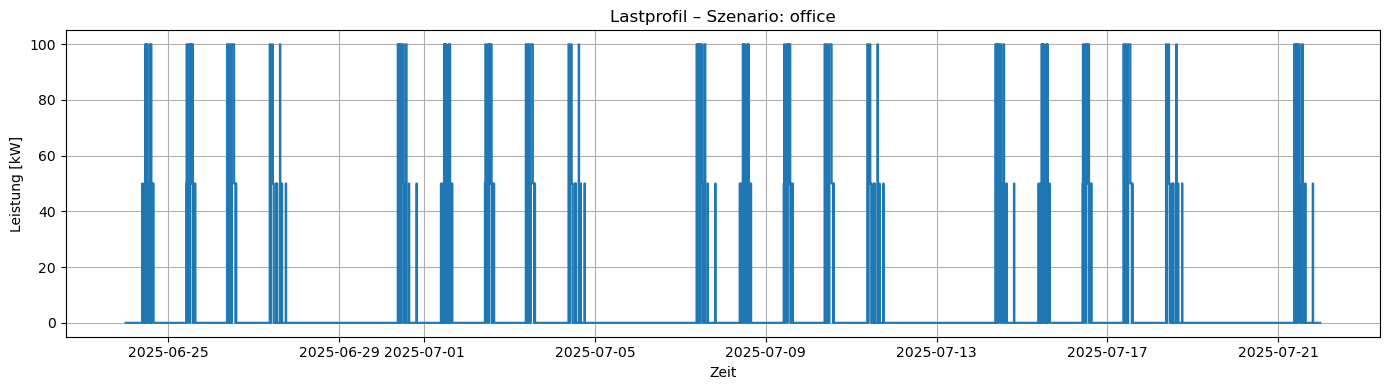

In [10]:
plt.figure(figsize=(14, 4))
plt.step(timestamps, load_kw, where="post")
plt.xlabel("Zeit")
plt.ylabel("Leistung [kW]")
plt.title(f"Lastprofil – Szenario: {scenario.get('name', scenario_name)}")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
scenario = load_scenario("../scenarios/office.yaml")
timestamps_base, load_kw_base, sessions = simulate_load_profile(scenario)

timestamps_base[0], timestamps_base[-1]
